In [ ]:
'''
********************************************************************
* Program: 2-2-1 feed forward NN.py                                *
* Coded by: Chaoran Lei                                            *
* SJSU ID: 015264119                                               *
*                                                                  *
* Reference: https://victorzhou.com/blog/intro-to-neural-networks/ *
********************************************************************
'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

In [2]:
class OurNeuralNetwork:
    
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues):
        
        learn_rate = 0.1
        epochs = 1000 # number of times to loop through the entire dataset
        data_loss = []
        
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

              # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                #print("Epoch %d loss: %.3f" % (epoch, loss))
                
                #temp = np.array([epoch,loss])
                
                data_loss.append([epoch,loss])
                
                #data_loss.append(np.array(temp)
                                        
                #x_axis = data_loss[:0]
                #y_axis = data_loss[:1]
                
                
        return data_loss
                
    def y_preds(self, data, all_y_trues):
        return np.apply_along_axis(self.feedforward, 1, data)

In [3]:
# bulid the dataset
data = np.array([[0.3, 0.457], [1.1, 2.37], [4.57, 5.55], [0.5, 0.34], [1.45, 1.11], [4.78, 4.44],])
all_y_trues = np.array([0, 0, 0, 1, 1, 1])

# train the dataset
network = OurNeuralNetwork()
data_loss = network.train(data, all_y_trues)
y_preds = network.y_preds(data,all_y_trues)

In [4]:
Pre_data = np.array([3.32, 3.01])
if network.feedforward(Pre_data) <= 0.5:
    print("The input data (3.32, 3.01) belongs to class C1 ") 
if network.feedforward(Pre_data) > 0.5:
    print("The input data (3.32, 3.01) belongs to class C2 ") 

The input data (3.32, 3.01) belongs to class C2 


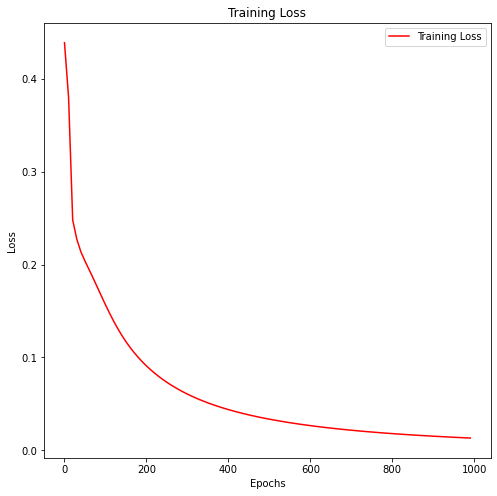

In [5]:
#plot the loss function
x_axis = [x[0] for x in data_loss]
y_axis = [x[1] for x in data_loss]

plt.figure(1, figsize = (8,8))
plt.plot(x_axis, y_axis,'r',label = "Training Loss")
plt.legend()
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()